In [1]:
from edgedroid.models.timings import *

runs_per_model = 30
task_steps = 100

models = {
    "empirical": {
        "low": EmpiricalExecutionTimeModel.from_default_data(neuroticism=0.0),
        "high": EmpiricalExecutionTimeModel.from_default_data(neuroticism=1.0),
    },
    "theoretical": {
        "low": TheoreticalExecutionTimeModel.from_default_data(neuroticism=0.0),
        "high": TheoreticalExecutionTimeModel.from_default_data(neuroticism=1.0),
    },
    "constant": {"n/a": ConstantExecutionTimeModel.from_default_data()},
    "naive": {"n/a": NaiveExecutionTimeModel.from_default_data()},
    "fitted-naive": {"n/a": FittedNaiveExecutionTimeModel.from_default_data()},
}

In [2]:
import numpy as np

ttfs = np.linspace(0, 5, 25)
ttfs

array([0.        , 0.20833333, 0.41666667, 0.625     , 0.83333333,
       1.04166667, 1.25      , 1.45833333, 1.66666667, 1.875     ,
       2.08333333, 2.29166667, 2.5       , 2.70833333, 2.91666667,
       3.125     , 3.33333333, 3.54166667, 3.75      , 3.95833333,
       4.16666667, 4.375     , 4.58333333, 4.79166667, 5.        ])

In [3]:
import pandas as pd
import itertools as it

combs = deque()
for model_name, variants in models.items():
    for neuro, model in variants.items():
        for ttf, run in it.product(ttfs, range(1, runs_per_model + 1)):
            combs.append((model, model_name, neuro, ttf, run))

# results = pd.DataFrame(
#     columns=["model", "neuroticism", "repetition", "step", "exec_time", "ttf", "duration", "cumulative_duration"],
#     index=np.arange(0, len(combs))
# )
# results["model"] = "fitted-naive"
# results["neuroticism"] = "n/a"
# results["repetition"]  = -1
# results["step"] = -1
# results["exec_time"] = 0.0
# results["ttf"] = 0.0
# results["duration"] = 0.0
# results["cumulative_duration"] = 0.0
#
# results["model"] = results["model"].astype(pd.CategoricalDtype(models.keys(), ordered=False))
# results["neuroticism"] = results["neuroticism"].astype(pd.CategoricalDtype(["n/a", "low", "high"], ordered=True))
# results["repetition"] = results["repetition"].astype(int)
# results["step"] = results["step"].astype(int)
# results["exec_time"] = results["exec_time"].astype(float)
# results["ttf"] = results["ttf"].astype(float)
# results["duration"] = results["duration"].astype(float)
# results["cumulative_duration"] = results["cumulative_duration"].astype(float)
#
# results.shape

In [4]:
from tqdm.notebook import tqdm_notebook as tqdm

curr_idx = 0
tqdm_iter = tqdm(combs)

rows = deque()

for model, model_name, neuro, ttf, repetition in tqdm_iter:
    tqdm_iter.set_description(
        desc=f"Model {model_name}, neuro {neuro}, TTF {ttf:0.02f}s, repetition {repetition}"
    )
    model.reset()
    cum_duration = 0.0

    for step in range(1, task_steps + 1):
        exec_time = model.advance(ttf).get_execution_time()
        duration = exec_time + ttf
        cum_duration += duration

        rows.append(
            {
                "model": model_name,
                "neuroticism": neuro,
                "repetition": repetition,
                "step": step,
                "exec_time": exec_time,
                "ttf": ttf,
                "duration": duration,
                "cumulative_duration": cum_duration,
            }
        )

        # results.loc[curr_idx, ["model", "neuroticism", "repetition", "step", "exec_time", "ttf", "duration", "cumulative_duration"]] = \
        #     [model_name, neuro, repetition, step, exec_time, ttf, duration, cum_duration]


        # model_name
        # results.at[curr_idx, "neuroticism"] = neuro
        # results.at[curr_idx, "repetition"] = repetition
        # results.at[curr_idx, "step"] = step
        # results.at[curr_idx, "exec_time"] = exec_time
        # results.at[curr_idx, "ttf"] = ttf
        # results.at[curr_idx, "duration"] = duration
        # results.at[curr_idx, "cumulative_duration"] = cum_duration

        curr_idx += 1

results = pd.DataFrame(rows)
results["model"] = results["model"].astype(pd.CategoricalDtype(models.keys(), ordered=False))
results["neuroticism"] = results["neuroticism"].astype(pd.CategoricalDtype(["n/a", "low", "high"], ordered=True))
results["repetition"] = results["repetition"].astype(int)
results["step"] = results["step"].astype(int)
results["exec_time"] = results["exec_time"].astype(float)
results["ttf"] = results["ttf"].astype(float)
results["duration"] = results["duration"].astype(float)
results["cumulative_duration"] = results["cumulative_duration"].astype(float)
results

  0%|          | 0/5250 [00:00<?, ?it/s]

,model,neuroticism,repetition,step,exec_time,ttf,duration,cumulative_duration
0,empirical,low,1,1,4.216876,0.0,4.216876,4.216876
1,empirical,low,1,2,3.613991,0.0,3.613991,7.830867
2,empirical,low,1,3,6.011716,0.0,6.011716,13.842583
3,empirical,low,1,4,5.762806,0.0,5.762806,19.605389
4,empirical,low,1,5,7.035523,0.0,7.035523,26.640911
...,...,...,...,...,...,...,...,...
524995,fitted-naive,n/a,30,96,3.540246,5.0,8.540246,959.464077
524996,fitted-naive,n/a,30,97,6.030211,5.0,11.030211,970.494288
524997,fitted-naive,n/a,30,98,11.239725,5.0,16.239725,986.734013
524998,fitted-naive,n/a,30,99,6.908138,5.0,11.908138,998.642151


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper")
sns.set_style("whitegrid")

end_steps = results[results.step == results.step.max()]
end_steps

,model,neuroticism,repetition,step,exec_time,ttf,duration,cumulative_duration
99,empirical,low,1,100,4.174971,0.0,4.174971,503.031379
199,empirical,low,2,100,6.519128,0.0,6.519128,489.211964
299,empirical,low,3,100,3.780236,0.0,3.780236,508.077902
399,empirical,low,4,100,5.791741,0.0,5.791741,500.243754
499,empirical,low,5,100,5.609995,0.0,5.609995,544.437126
...,...,...,...,...,...,...,...,...
524599,fitted-naive,n/a,26,100,4.324332,5.0,9.324332,1123.502978
524699,fitted-naive,n/a,27,100,3.819875,5.0,8.819875,1062.686100
524799,fitted-naive,n/a,28,100,2.673294,5.0,7.673294,1128.186198
524899,fitted-naive,n/a,29,100,6.722178,5.0,11.722178,1074.202412


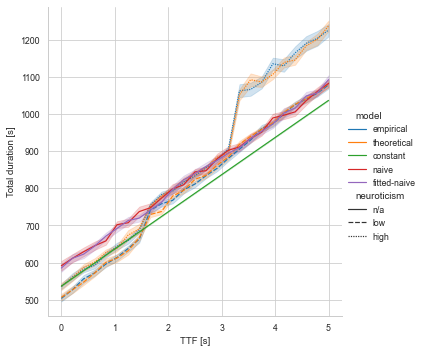

In [6]:
fg = sns.relplot(
    kind="line",
    data=end_steps,
    x="ttf",
    y="cumulative_duration",
    hue="model",
    # style="neuroticism",
    hue_order=["empirical", "theoretical", "constant", "naive", "fitted-naive"],
    style="neuroticism",
)
fg.set_axis_labels("TTF [s]", "Total duration [s]")
plt.show()

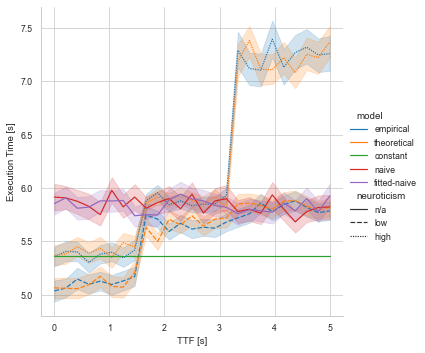

In [9]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="ttf",
    y="exec_time",
    hue="model",
    hue_order=["empirical", "theoretical", "constant", "naive", "fitted-naive"],
    style="neuroticism",
)
fg.set_axis_labels("TTF [s]", "Execution Time [s]")
plt.show()